In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ultimate-university-ranking/GreenMetric/GreenMetric_2020-.csv
/kaggle/input/ultimate-university-ranking/GreenMetric/GreenMetric_2021-.csv
/kaggle/input/ultimate-university-ranking/GreenMetric/GreenMetric_2016-.csv
/kaggle/input/ultimate-university-ranking/GreenMetric/GreenMetric_2017-.csv
/kaggle/input/ultimate-university-ranking/GreenMetric/GreenMetric_2022-.csv
/kaggle/input/ultimate-university-ranking/GreenMetric/GreenMetric_2019-.csv
/kaggle/input/ultimate-university-ranking/GreenMetric/GreenMetric_2018-.csv
/kaggle/input/ultimate-university-ranking/NatureIndex/NatureIndex_2019.csv
/kaggle/input/ultimate-university-ranking/NatureIndex/NatureIndex_2015.csv
/kaggle/input/ultimate-university-ranking/NatureIndex/NatureIndex_2022.csv
/kaggle/input/ultimate-university-ranking/NatureIndex/NatureIndex_2020.csv
/kaggle/input/ultimate-university-ranking/NatureIndex/NatureIndex_2018.csv
/kaggle/input/ultimate-university-ranking/NatureIndex/NatureIndex_2021.csv
/kaggle/input/ulti

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')


In [3]:
df = pd.read_csv('../input/ultimate-university-ranking/Times/Times_2023.csv')

In [4]:
df.shape

(2345, 29)

In [5]:
#Take out columns that wont be useful for this exploratory analysis
df = df[['rank_order', 'rank', 'name', 'scores_overall', 'scores_overall_rank',
       'scores_teaching', 'scores_teaching_rank', 'scores_research',
       'scores_research_rank', 'scores_citations', 'scores_citations_rank',
       'scores_industry_income', 'scores_industry_income_rank',
       'scores_international_outlook', 'scores_international_outlook_rank',
       'record_type', 
    #'member_level', 'url', 'nid', 
        'location',
       'stats_number_students', 'stats_student_staff_ratio',
       'stats_pc_intl_students', 'stats_female_male_ratio', 
       #'aliases',
      # 'subjects_offered', 'closed', 'unaccredited', 'disabled'
   ]].copy()

In [6]:
df.head(100)

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,...,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,record_type,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio
0,10,1,University of Oxford,96.4,10,92.3,5,99.7,1,99.0,...,74.9,158,96.2,28,master_account,United Kingdom,"20,965",10.6,42%,48 : 52
1,20,2,Harvard University,95.2,20,94.8,1,99.0,3,99.3,...,49.5,418,80.5,214,private,United States,"21,887",9.6,25%,50 : 50
2,30,=3,University of Cambridge,94.8,30,90.9,7,99.5,2,97.0,...,54.2,335,95.8,34,master_account,United Kingdom,"20,185",11.3,39%,47 : 53
3,40,=3,Stanford University,94.8,40,94.2,2,96.7,7,99.8,...,65.0,232,79.8,223,private,United States,"16,164",7.1,24%,46 : 54
4,50,5,Massachusetts Institute of Technology,94.2,50,90.7,8,93.6,11,99.8,...,90.9,62,89.3,119,private,United States,"11,415",8.2,33%,40 : 60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,960,=95,Institut Polytechnique de Paris,63.6,960,58.5,68,58.8,85,64.8,...,72.7,173,95.6,38,master_account,France,"5,999",6.7,41%,24 : 76
96,970,=95,Nanjing University,63.6,970,58.4,69,58.2,91,74.3,...,87.3,84,55.2,568,master_account,China,"36,426",16.5,8%,54 : 46
97,980,98,Vanderbilt University,63.5,980,49.5,113,47.5,153,96.5,...,66.7,216,50.6,657,private,United States,"12,696",3.8,15%,55 : 45
98,990,=99,City University of Hong Kong,63.4,990,47.2,130,53.0,120,79.9,...,76.6,147,99.6,2,master_account,Hong Kong,"9,099",12.1,62%,54 : 46


In [7]:
#Renaming Columns
df = df.rename(columns={'scores_teaching': 'scores_staff',
                    'scores_teaching_rank':'staff_rank',
                   'scores_research_rank':'research_rank',
                  'scores_citations_rank': 'citations_rank',
                  'scores_international_outlook_rank':'international_outlook_rank',
                  'stats_number_students': 'student_body_size'})

In [8]:
#Delete comma's in column and then change str type to float
df['student_body_size'] = df['student_body_size'].str.replace(',', '').astype(float)



In [9]:
df['name'] = df['name'].astype(object)

In [10]:
#Rank order was multiplied by 10x by default
df['rank_order'] = df['rank_order']/10

In [11]:
df.dtypes

rank_order                      float64
rank                             object
name                             object
scores_overall                   object
scores_overall_rank               int64
scores_staff                    float64
staff_rank                        int64
scores_research                 float64
research_rank                     int64
scores_citations                float64
citations_rank                    int64
scores_industry_income          float64
scores_industry_income_rank       int64
scores_international_outlook    float64
international_outlook_rank        int64
record_type                      object
location                         object
student_body_size               float64
stats_student_staff_ratio       float64
stats_pc_intl_students           object
stats_female_male_ratio          object
dtype: object

In [12]:
df.describe()

,rank_order,scores_overall_rank,scores_staff,staff_rank,scores_research,research_rank,scores_citations,citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,international_outlook_rank,student_body_size,stats_student_staff_ratio
count,2345.000000,2.345000e+03,1799.000000,2345.000000,1799.000000,2345.000000,1799.000000,2345.000000,1799.000000,2345.000000,1799.000000,2345.000000,2345.000000,2344.000000
mean,23980.131727,2.398013e+05,27.018010,690.447761,23.016898,690.447761,48.495887,690.447761,47.104558,690.447761,46.880378,690.447761,19220.701066,18.722056
std,41905.958374,4.190596e+05,13.282243,593.075921,16.763819,593.075921,27.967185,593.075921,15.093682,593.075921,22.582401,593.075921,24575.292996,11.921330
min,1.000000,1.000000e+01,11.600000,0.000000,7.400000,0.000000,0.800000,0.000000,36.900000,0.000000,14.100000,0.000000,115.000000,0.400000
25%,587.000000,5.870000e+03,18.000000,41.000000,11.300000,41.000000,23.100000,41.000000,37.800000,41.000000,27.900000,41.000000,6988.000000,12.300000
50%,1173.000000,1.173000e+04,22.700000,627.000000,17.000000,627.000000,47.200000,627.000000,40.500000,627.000000,42.100000,627.000000,13956.000000,16.300000
75%,1759.000000,1.759000e+04,31.850000,1213.000000,28.900000,1213.000000,72.350000,1213.000000,48.300000,1213.000000,62.100000,1213.000000,25215.000000,21.900000
max,100054.400000,1.000544e+06,94.800000,1799.000000,99.700000,1799.000000,100.000000,1799.000000,100.000000,1799.000000,99.700000,1799.000000,460632.000000,232.200000


In [13]:
#Find Null values
df.isna().sum()

rank_order                        0
rank                              0
name                              0
scores_overall                  546
scores_overall_rank               0
scores_staff                    546
staff_rank                        0
scores_research                 546
research_rank                     0
scores_citations                546
citations_rank                    0
scores_industry_income          546
scores_industry_income_rank       0
scores_international_outlook    546
international_outlook_rank        0
record_type                       0
location                          0
student_body_size                 0
stats_student_staff_ratio         1
stats_pc_intl_students            0
stats_female_male_ratio          90
dtype: int64

In [14]:
#Looking for duplicate Universities in rankings
df.loc[df.duplicated(subset=['name'])]

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_staff,staff_rank,scores_research,research_rank,scores_citations,...,scores_industry_income,scores_industry_income_rank,scores_international_outlook,international_outlook_rank,record_type,location,student_body_size,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio


Text(0, 0.5, 'Count')

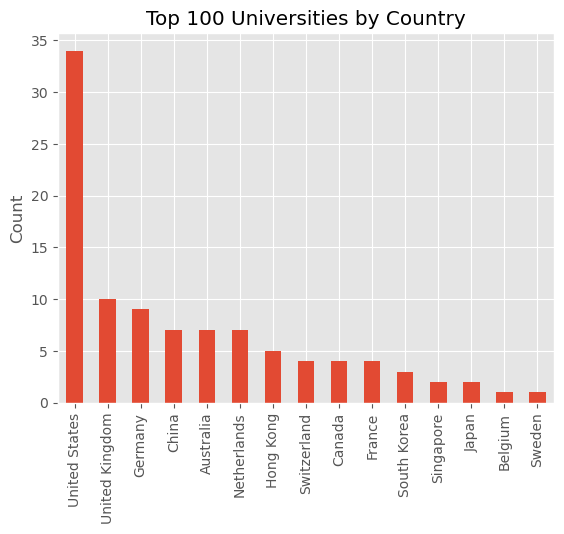

In [15]:
#Bar Graph breakdown of top 100 Universities by Country
ax = df['location'].head(100) \
.value_counts() \
.plot(kind='bar', title ='Top 100 Universities by Country')

ax.set_ylabel("Count")

<Axes: title={'center': 'Top 10 Universities by Country'}, ylabel='location'>

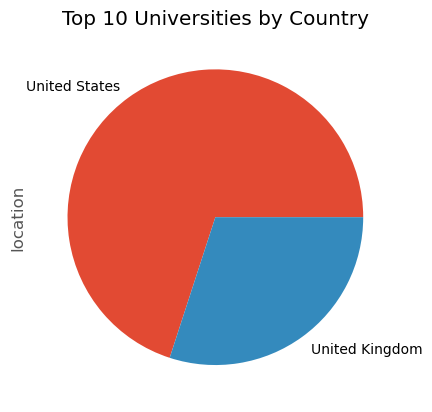

In [16]:
#Breakdown of top 10 Universities by Country into Pie Chat for better visulization
df['location'].head(10) \
.value_counts() \
.plot(kind='pie', title ='Top 10 Universities by Country')

<Axes: ylabel='Frequency'>

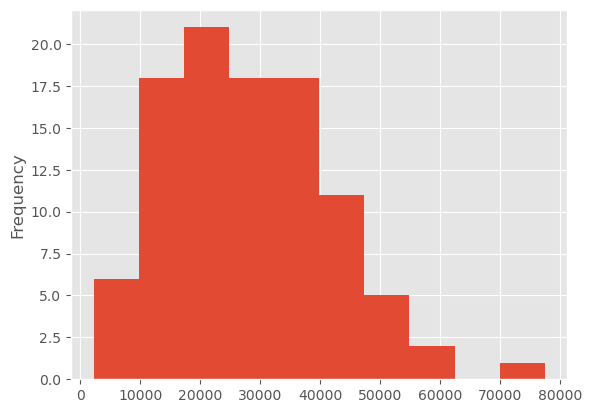

In [19]:
#Histogram breakdown of the Student Body Size of Top 100 Universities
df['student_body_size'].head(100).plot(kind='hist', bins=10)


In [18]:
#Find the 1 University with a student body size greater than 70,000 in the top 100 univeristies
df_100 = df.head(100)
df_100[df_100['student_body_size'] > 70000]

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_staff,staff_rank,scores_research,research_rank,scores_citations,...,scores_industry_income,scores_industry_income_rank,scores_international_outlook,international_outlook_rank,record_type,location,student_body_size,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio
17,18.0,18,University of Toronto,87.4,180,77.3,25,93.3,12,92.8,...,65.5,225,89.7,115,master_account,Canada,77468.0,25.8,26%,56 : 44


/tmp/ipykernel_32/1324633523.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_100['decile'] = pd.qcut(df_top_100['rank_order'], 10, labels=False)


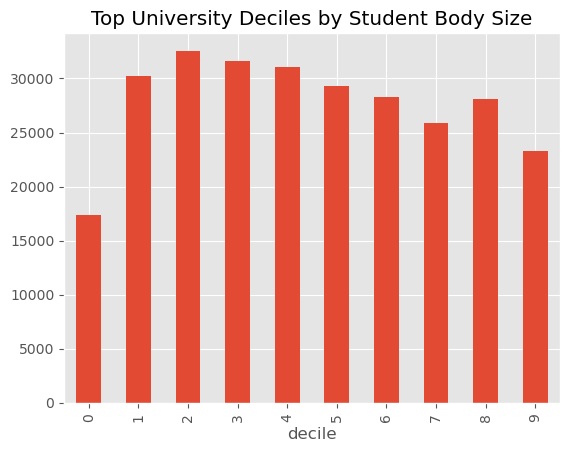

In [20]:
#Looking at the Student Body Size of the deciles of top 100 ranked Universities
df_top_100 = df.head(100)
df_top_100['decile'] = pd.qcut(df_top_100['rank_order'], 10, labels=False)
df_top_100.head(10)
average_sizes = df_top_100.groupby('decile')['student_body_size'].mean() \
.plot(kind='bar', title ='Top University Deciles by Student Body Size')

/tmp/ipykernel_32/4096594349.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_100['decile'] = pd.qcut(df_top_100['rank_order'], 10, labels=False)


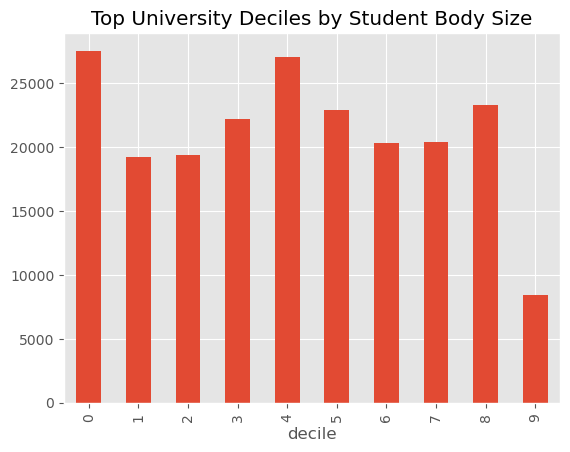

In [21]:
#Looking at the Student Body Size of the deciles of top 2000 ranked Universities
df_top_100 = df.head(2000)
df_top_100['decile'] = pd.qcut(df_top_100['rank_order'], 10, labels=False)
df_top_100.head(10)
average_sizes = df_top_100.groupby('decile')['student_body_size'].mean() \
.plot(kind='bar', title ='Top University Deciles by Student Body Size')
plt.show()

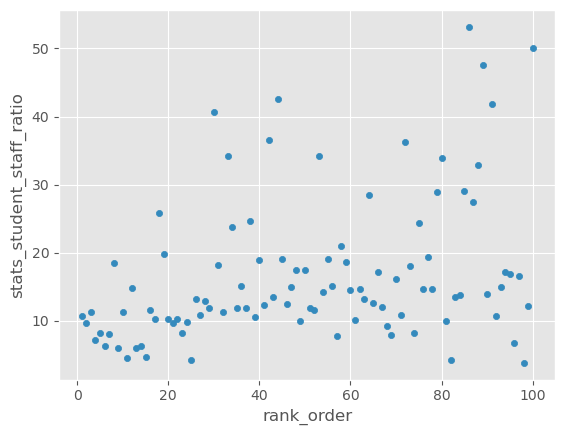

In [22]:
# Scatter plot of Top 100 Universities by their student to staff ratio
df.head(100).plot(kind='scatter',
       x='rank_order',
       y='stats_student_staff_ratio')
plt.show()

<Axes: xlabel='rank_order', ylabel='student_body_size'>

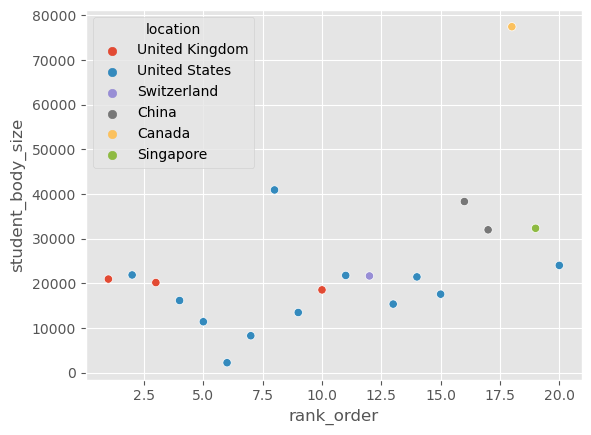

In [29]:
 #Scatter plot of Top Univerisities by Student-body size (colored by location)
    sns.scatterplot(
         x='rank_order',
         y='student_body_size',
         hue='location',
         data = df.head(20)
    )


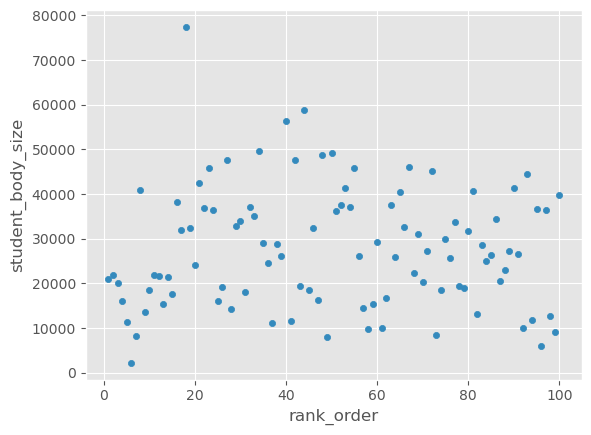

In [23]:
# Scatter plot of student body size of Top 100 Universities
df.head(100).plot(kind='scatter',
       x='rank_order',
       y='student_body_size')
plt.show()